# Data Visualization with data from SQL

Downloading database file.


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-12-19 13:37:23--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  26.8MB/s    in 1.3s    

2022-12-19 13:37:25 (26.8 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connecting to the database.


In [3]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

In [4]:
import pandas as pd

In [5]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Listing all the tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Groupping by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Describing a table


In [50]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

In [54]:
QUERY = """
SELECT LanguageWorkedWith
FROM LanguageWorkedWith
"""
df88 = pd.read_sql_query(QUERY,conn)
df88

,LanguageWorkedWith
0,C
1,C++
2,C#
3,Python
4,SQL
...,...
59787,Go
59788,HTML/CSS
59789,PHP
59790,Python


In [55]:
df88.value_counts()
df88_counts = df88.value_counts()

In [56]:
df88_counts = df88_counts.reset_index()
df88_counts.columns = ['LanguageWorkedWith', 'Counts'] # change column names
df88_counts

,LanguageWorkedWith,Counts
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542
5,Java,4506
6,C#,4288
7,TypeScript,3232
8,PHP,2913
9,C++,1946


In [72]:
QUERY = """
SELECT DatabaseWorkedWith
FROM DatabaseWorkedWith
"""
df99 = pd.read_sql_query(QUERY,conn)
df99

,DatabaseWorkedWith
0,MySQL
1,SQLite
2,DynamoDB
3,PostgreSQL
4,SQLite
...,...
31370,MySQL
31371,PostgreSQL
31372,Microsoft SQL Server
31373,Redis


In [79]:
df101 = df99[df99['DatabaseWorkedWith'] == 'MySQL']
df101


,DatabaseWorkedWith
0,MySQL
8,MySQL
11,MySQL
17,MySQL
24,MySQL
...,...
31336,MySQL
31342,MySQL
31356,MySQL
31366,MySQL


In [60]:
df99.value_counts()
df99_counts = df99.value_counts()
df99_counts = df99_counts.reset_index()
df99_counts.columns = ['DatabaseWorkedWith', 'Counts'] # change column names
df99_counts

,DatabaseWorkedWith,Counts
0,MySQL,5469
1,Microsoft SQL Server,4110
2,PostgreSQL,4097
3,SQLite,3248
4,MongoDB,3016
5,Redis,2508
6,Elasticsearch,1954
7,Oracle,1744
8,MariaDB,1709
9,Firebase,1314


In [66]:
len(df99[df99['DatabaseWorkedWith']=='MySQL']) & len(df99[df99['DatabaseWorkedWith']!=';'])

31375

# Visualizing distribution of data


Plotting a histogram of `ConvertedComp.`

In [15]:
import matplotlib.pyplot as plt

(array([9659.,  238.,  115.,  125.,   99.,  131.,   34.,   15.,   15.,
         151.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <BarContainer object of 10 artists>)

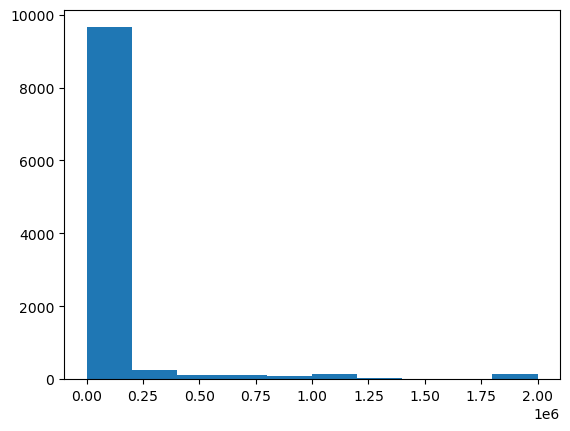

In [16]:
QUERY = """
SELECT ConvertedComp as count
FROM master
"""
df2 = pd.read_sql_query(QUERY,conn)
df2

plt.hist(df2)

### Box Plots


Plotting a box plot of `Age.`


<AxesSubplot:>

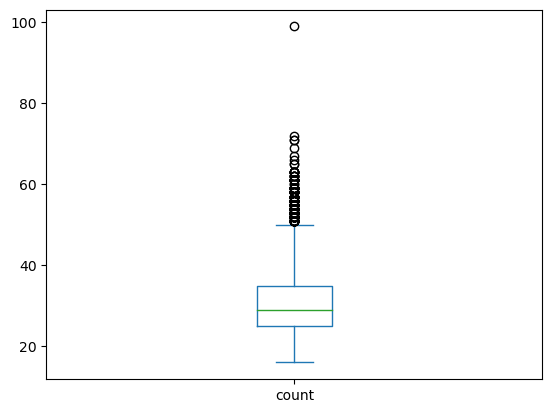

In [17]:
QUERY = """
SELECT Age as count
FROM master
"""
df3 = pd.read_sql_query(QUERY,conn)
df3

df3.dropna()
df3.plot(kind= 'box')

## Visualizing relationships in data


### Scatter Plots


Creating a scatter plot of `Age` and `WorkWeekHrs.`

Text(0, 0.5, 'Weekly Worked Hours')

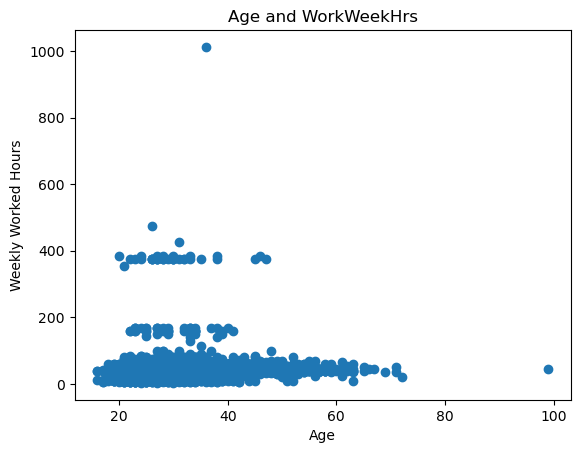

In [18]:
QUERY = """
SELECT Age,WorkWeekHrs
FROM master
"""
df4 = pd.read_sql_query(QUERY,conn)

#plt.scatter(Age,WorkWeekHrs, data=df4)
plt.scatter(df4["Age"],df4["WorkWeekHrs"])
plt.title("Age and WorkWeekHrs")
plt.xlabel("Age")
plt.ylabel("Weekly Worked Hours")

In [19]:
df4.WorkWeekHrs.describe()

count    11276.000000
mean        42.064606
std         24.672741
min          3.000000
25%         40.000000
50%         40.000000
75%         43.000000
max       1012.000000
Name: WorkWeekHrs, dtype: float64

### Bubble Plots


Creating a bubble plot of `WorkWeekHrs` and `CodeRevHrs` and using `Age` column as bubble size.

In [21]:
QUERY = """
SELECT WorkWeekHrs,CodeRevHrs,Age
FROM master
"""
df5 = pd.read_sql_query(QUERY,conn)
#df5.dropna()
df5

,WorkWeekHrs,CodeRevHrs,Age
0,80.0,NaN,22.0
1,32.0,12.0,23.0
2,40.0,5.0,28.0
3,40.0,NaN,26.0
4,45.0,5.0,29.0
...,...,...,...
11393,40.0,NaN,36.0
11394,40.0,5.0,25.0
11395,40.0,5.0,34.0
11396,42.5,2.0,25.0


Text(0.5, 1.0, 'WorkWeekHrs and CodeRevHrs')

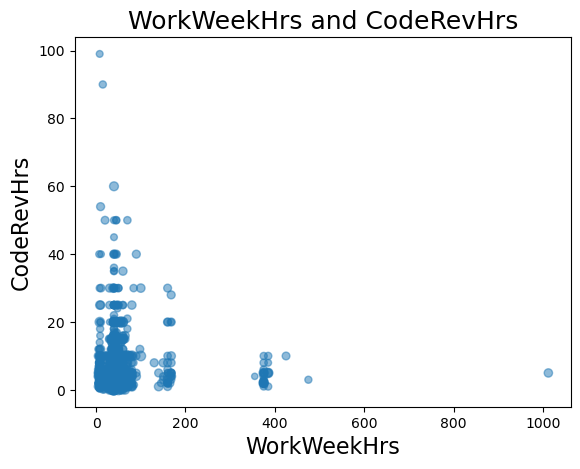

In [22]:
plt.scatter(df5["WorkWeekHrs"], df5["CodeRevHrs"], s=df5["Age"], alpha=0.5)

plt.xlabel("WorkWeekHrs", size=16)
plt.ylabel("CodeRevHrs", size=16)
plt.title("WorkWeekHrs and CodeRevHrs", size=18)

## Visualizing composition of data


### Pie Charts


Creating a pie chart of the top 5 databases that respondents wish to learn next year.

In [24]:
table_name = 'DatabaseDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df10 = pd.read_sql_query(QUERY,conn)
print(df10.iat[0,0])

CREATE TABLE "DatabaseDesireNextYear" (
"Respondent" INTEGER,
  "DatabaseDesireNextYear" TEXT
)


In [25]:
QUERY = """
SELECT DatabaseDesireNextYear
FROM DatabaseDesireNextYear
"""
df6 = pd.read_sql_query(QUERY,conn)
#df5.dropna()
df6.value_counts()

value_counts = df6.value_counts()

# converting to df and assigning new names to the columns
df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['DatabaseDesireNextYear', 'Counts'] # change column names
df_value_counts
df7 = df_value_counts.iloc[0:5,0:]
df7

,DatabaseDesireNextYear,Counts
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


Text(0.5, 1.0, 'DatabaseDesireNextYear')

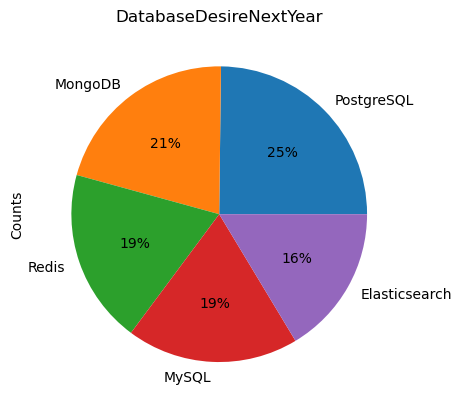

In [26]:
df7.plot(kind='pie',labels=df7['DatabaseDesireNextYear'], y='Counts', autopct='%1.0f%%', legend=None)
plt.title(label='DatabaseDesireNextYear')

### Stacked Charts


Creating a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.

In [33]:
df55 = df5.sort_values('Age')
#df55.shape
df_filtered = df5[(df5['Age'] == 30) | (df5['Age'] == 31) | (df5['Age'] == 32) | (df5['Age'] == 33) | (df5['Age'] == 34) | (df5['Age'] == 35)]
df_filtered

,WorkWeekHrs,CodeRevHrs,Age
5,8.0,3.0,31.0
11,40.0,2.0,34.0
12,40.0,2.0,32.0
18,42.0,15.0,34.0
22,40.0,2.0,33.0
...,...,...,...
11385,42.0,4.0,32.0
11391,50.0,2.0,32.0
11392,56.0,14.0,32.0
11395,40.0,5.0,34.0


In [34]:
df_filtered['Age'].value_counts()

30.0    651
31.0    531
32.0    489
33.0    483
34.0    395
35.0    393
Name: Age, dtype: int64

In [37]:
df_stackedchart = df_filtered.groupby('Age')['WorkWeekHrs', 'CodeRevHrs'].median()
df_stackedchart

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,WorkWeekHrs,CodeRevHrs
Age,,
30.0,40.0,4.0
31.0,40.0,4.0
32.0,40.0,4.0
33.0,40.0,4.0
34.0,40.0,4.0
35.0,40.0,4.0


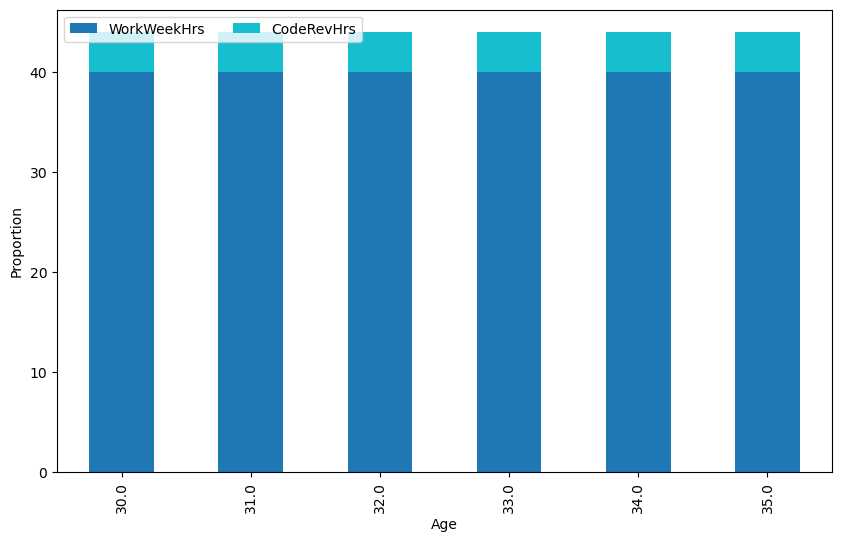

In [42]:
df_stackedchart.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Age")
plt.ylabel("Proportion")
plt.show()

## Visualizing comparison of data


### Line Chart


Plotting the median `ConvertedComp` for all ages from 45 to 60.

In [90]:
QUERY = """
SELECT ConvertedComp,Age
FROM master
"""
df_cc = pd.read_sql_query(QUERY,conn)
df_cc.dropna()
df_cc

,ConvertedComp,Age
0,61000.0,22.0
1,95179.0,23.0
2,90000.0,28.0
3,455352.0,26.0
4,65277.0,29.0
...,...,...
11393,130000.0,36.0
11394,19880.0,25.0
11395,105000.0,34.0
11396,80371.0,25.0


In [95]:
df_45to60 = df_cc[(df_cc['Age'] == 45) | (df_cc['Age'] == 46) | (df_cc['Age'] == 47) | (df_cc['Age'] == 48) | (df_cc['Age'] == 49) | (df_cc['Age'] == 50) |  
                  (df_cc['Age'] == 51) | (df_cc['Age'] == 52) | (df_cc['Age'] == 53) | (df_cc['Age'] == 54) | (df_cc['Age'] == 55) | (df_cc['Age'] == 56) |  
                  (df_cc['Age'] == 57) | (df_cc['Age'] == 58) | (df_cc['Age'] == 59) | (df_cc['Age'] == 60)]
df_45to60

,ConvertedComp,Age
7,103000.0,47.0
50,NaN,54.0
66,54996.0,47.0
75,62807.0,47.0
93,72522.0,45.0
...,...,...
11342,76339.0,45.0
11345,68705.0,46.0
11350,300000.0,48.0
11372,87668.0,50.0


In [98]:
df_linechart = df_45to60.groupby('Age')['ConvertedComp'].median()
df_linechart

Age
45.0     90330.0
46.0     91593.0
47.0     91606.0
48.0    105750.0
49.0     85248.0
50.0     95000.0
51.0    100000.0
52.0    105500.0
53.0    100463.0
54.0    121000.0
55.0    119000.0
56.0     99530.5
57.0    117578.0
58.0    108000.0
59.0    110000.0
60.0    132287.5
Name: ConvertedComp, dtype: float64

In [100]:
df_linechart = df_linechart.reset_index()
df_linechart.columns = ['Age', 'ConvertedComp'] # change column names
df_linechart

,Age,ConvertedComp
0,45.0,90330.0
1,46.0,91593.0
2,47.0,91606.0
3,48.0,105750.0
4,49.0,85248.0
5,50.0,95000.0
6,51.0,100000.0
7,52.0,105500.0
8,53.0,100463.0
9,54.0,121000.0


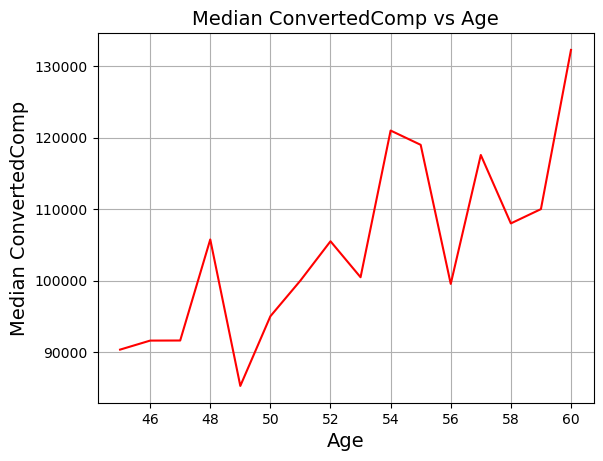

In [102]:
plt.plot(df_linechart['Age'], df_linechart['ConvertedComp'], color='red')
plt.title('Median ConvertedComp vs Age', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Median ConvertedComp', fontsize=14)
plt.grid(True)
plt.show()

In [103]:
df_25to30 = df_cc[(df_cc['Age'] == 25) | (df_cc['Age'] == 26) | (df_cc['Age'] == 27) | (df_cc['Age'] == 28) | (df_cc['Age'] == 29) | (df_cc['Age'] == 30)]
df_25to30

,ConvertedComp,Age
2,90000.0,28.0
3,455352.0,26.0
4,65277.0,29.0
16,20623.0,27.0
24,107000.0,27.0
...,...,...
11389,35518.0,26.0
11390,26586.0,26.0
11394,19880.0,25.0
11396,80371.0,25.0


In [105]:
df_linechart2 = df_25to30.groupby('Age')['ConvertedComp'].median()
df_linechart2 = df_linechart2.reset_index()
df_linechart2.columns = ['Age', 'ConvertedComp'] # change column names
df_linechart2

,Age,ConvertedComp
0,25.0,39920.0
1,26.0,43834.0
2,27.0,49620.0
3,28.0,51559.0
4,29.0,55674.0
5,30.0,56376.0


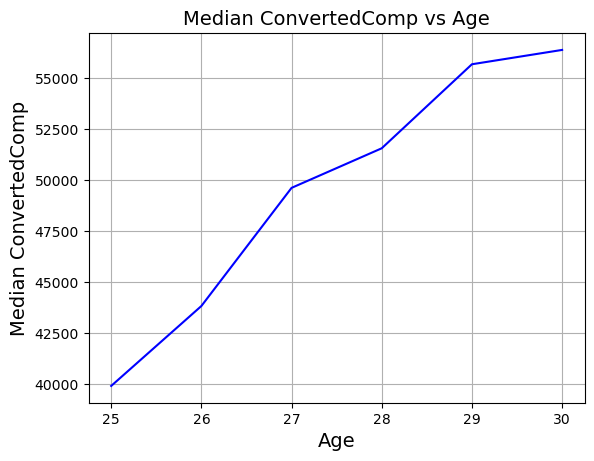

In [106]:
plt.plot(df_linechart2['Age'], df_linechart2['ConvertedComp'], color='blue')
plt.title('Median ConvertedComp vs Age', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Median ConvertedComp', fontsize=14)
plt.grid(True)
plt.show()

### Bar Chart


Creating a horizontal bar chart using column `MainBranch.`

In [107]:
QUERY = """
SELECT MainBranch
FROM master
"""
df_mb = pd.read_sql_query(QUERY,conn)
df_mb.dropna()
df_mb

,MainBranch
0,I am a developer by profession
1,I am a developer by profession
2,I am a developer by profession
3,I am a developer by profession
4,I am a developer by profession
...,...
11393,I am a developer by profession
11394,I am a developer by profession
11395,I am a developer by profession
11396,I am a developer by profession


In [109]:
df_mb.value_counts()

df_mbvc = df_mb.value_counts()

# converting to df and assigning new names to the columns
df_mbvc2 = pd.DataFrame(df_mbvc)
df_mbvc2 = df_mbvc2.reset_index()
df_mbvc2.columns = ['MainBranch', 'Counts'] # change column names
df_mbvc2

,MainBranch,Counts
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


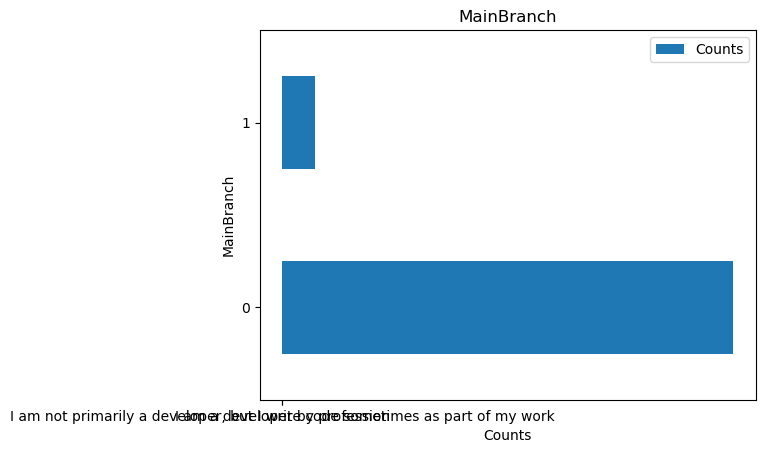

In [125]:
y=df_mbvc2['MainBranch']
x=df_mbvc2['Counts']
df_mbvc2.plot.barh()
plt.bar(y, x)
plt.title('MainBranch')
plt.ylabel('MainBranch')
plt.xlabel('Counts')
plt.show()

Close the database connection.


In [128]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
